In [1]:
from pyomo.environ import *

# Import Matplotlib to generate plots
import matplotlib.pyplot as plt
# Import numpy and scipy for certain numerical calculations below
import numpy as np

from scipy.special import gamma
import math

In [2]:
# Define the model
model = ConcreteModel(name='Example of a simple linear program')

#Define the variables
model.x = Var([1,2], domain=NonNegativeReals)

# Define the objective function
model.obj = Objective( expr=4*model.x[1] + 3*model.x[2], sense=maximize )

# Define the constraints
model.Constraint1 = Constraint( expr = model.x[1] + model.x[2] <=  40 )
model.Constraint2 = Constraint( expr = 2*model.x[1] + model.x[2] <= 60 )

# Print the model
model.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 4*x[1] + 3*x[2]

2 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body        : Upper : Active
        None :  -Inf : x[1] + x[2] :  40.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body          : Upper : Active
        None :  -Inf : 2*x[1] + x[2] :  60.0 :   True

5 Declarations: x_index x obj Constraint1 Constraint2


In [3]:
solver = SolverFactory('glpk')
solver.solve(model)
# Display solution of the problem
model.display()
print("Objective : ", model.obj())

Model Example of a simple linear program

  Variables:
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  20.0 :  None : False : False : NonNegativeReals
          2 :     0 :  20.0 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 140.0

  Constraints:
    Constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 40.0 :  40.0
    Constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 60.0 :  60.0
Objective :  140.0


C:\Users\yfq15\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: The following kwargs were not used by contour: 'label'


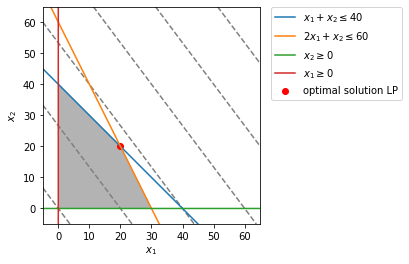

In [4]:
# Generate the feasible region plot of this problem

# Define meshgrid for feasible region
d = np.linspace(-5,65,700)
x1,x2 = np.meshgrid(d,d)

# Define the lines for the constraints
x = np.linspace(x1.min(), x1.max(), 2000)
# x1 + x2 <= 40
x21 = 40 - x 
# 2*x1 + x2 <= 60
x22 = 60 - 2*x
# obj: min 4x1 + 3x2
Z = 4*x1 + 3*x2

# Plot feasible region
fig, ax = plt.subplots()
feas_reg = ax.imshow( (
    (x1>=0) &           # Bound 1 
    (x2>=0) &           # Bound 2
    (x1 + x2 <= 40) &    # Constraint 1
    (2*x1 + x2 <= 60) # Constraint 2
    ).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

# Make plots of constraints
ax.plot(x, x21, label=r'$x_1 + x_2 \leq 40$')
ax.plot(x, x22, label=r'$2x_1 + x_2 \leq 60$')

# Nonnegativitivy constraints
plt.plot(x, np.zeros_like(x), label=r'$x_2 \geq 0$')
plt.plot(np.zeros_like(x), x, label=r'$x_1 \geq 0$')

# Objective function contours
ax.contour(x1, x2, Z,
                 colors='gray',  # negative contours will be dashed by default
                 linestyles='--',
                 label=r'$\max 4x_1 + 3x_2$'
                 )
# Optimal solution LP
ax.scatter(20,20,color='r', label='optimal solution LP')

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show() 

In [5]:
############ Integer Programming Example #############
######################################################

# Define the integer model
model_ilp = ConcreteModel(name='Example of a simple integer program')
#Define the variables
model_ilp.x = Var([1,2], domain=NonNegativeIntegers)
# Define the objective function
model_ilp.obj = Objective( expr=4*model_ilp.x[1] - model_ilp.x[2], sense=maximize )

# Define the constraints
model_ilp.Constraint1 = Constraint( expr = 7*model_ilp.x[1] - 2*model_ilp.x[2] <=  14 )
model_ilp.Constraint2 = Constraint( expr =  model_ilp.x[2] <= 3 )
model_ilp.Constraint3 = Constraint( expr = 2*model_ilp.x[1] - 2* model_ilp.x[2] <= 3 )

# Print the model
model_ilp.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeIntegers
          2 :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 4*x[1] - x[2]

3 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper : Active
        None :  -Inf : 7*x[1] - 2*x[2] :  14.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body : Upper : Active
        None :  -Inf : x[2] :   3.0 :   True
    Constraint3 : Size=1, Index=None, Active=True
        Key  : Lower : Body        

In [6]:
solver = SolverFactory('cbc')
solver.solve(model_ilp)
model_ilp.display()
print("Objective : ", model_ilp.obj())

Model Example of a simple integer program

  Variables:
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   2.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :   1.0 :  None : False : False : NonNegativeIntegers

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :   7.0

  Constraints:
    Constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 12.0 :  14.0
    Constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  1.0 :   3.0
    Constraint3 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  2.0 :   3.0
Objective :  7.0


C:\Users\yfq15\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'label'


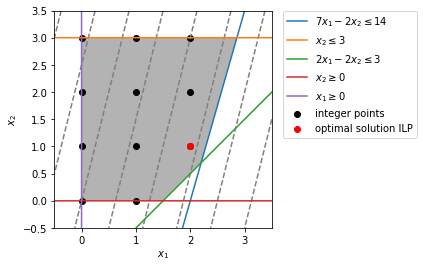

In [7]:
# Define grid for integer points
# Generate the feasible region plot of this problem

# Define meshgrid for feasible region
d = np.linspace(-0.5,3.5,400)
x1,x2 = np.meshgrid(d,d)

# Define the lines for the constraints
x = np.linspace(x1.min(), x1.max(), 2000)
# 7x1 - 2x2 <= 14
x21 = - (14 - 7*x) / 2 
# x2 <= 3
x22 = 3 - 0*x
# 2*x1 - 2x2 <= 3
x23 = x - 1.5
# obj: min 4x1 - x2
Z = 4*x1 - x2

# Plot feasible region
fig, bx = plt.subplots()
feas_reg = bx.imshow( (
    (x1>=0) &           # Bound 1 
    (x2>=0) &           # Bound 2
    (7*x1 - 2*x2 <= 14) &   # Constraint 1
    (x2 <= 3) &         # Constraint 2
    (2*x1 - 2*x2 <= 3)  # Constraint 3
    ).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

# Make plots of constraints
bx.plot(x, x21, label=r'$7x_1 - 2x_2 \leq 14$')
bx.plot(x, x22, label=r'$x_2 \leq 3$')
bx.plot(x, x23, label=r'$2x_1 - 2x_2 \leq 3$')

# Nonnegativitivy constraints
plt.plot(x, np.zeros_like(x), label=r'$x_2 \geq 0$')
plt.plot(np.zeros_like(x), x, label=r'$x_1 \geq 0$')

# Objective function contours
bx.contour(x1, x2, Z,
                 colors='gray',  # negative contours will be dashed by default
                 linestyles='--',
                 label=r'$\max 4x_1 - x_2$'
                 )

# Define grid for integer points
x1_int, x2_int = np.meshgrid(range(math.ceil(x1.max())), range(math.ceil(x2.max())))
idx = ((x1_int>=0) & (7*x1_int - 2*x2_int <= 14) & (x2_int <= 3) & (2*x1_int - 2*x2_int <= 3) & (x2_int>=0))
x1_int, x2_int = x1_int[idx], x2_int[idx]
bx.scatter(x1_int,x2_int,color='k', label='integer points')

# Plotting optimal solution ILP
bx.scatter(2,1,color='r', label='optimal solution ILP')

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
fig.canvas.draw()
#fig

In [8]:
############# Nonlinear Programming Example ##################

# Define the integer model
model_nlp = ConcreteModel(name='Example of a nonlinear program')
#Define the variables
model_nlp.x = Var([1,2], domain=NonNegativeIntegers)
# Define the objective function
model_nlp.obj = Objective( expr= (model_nlp.x[1]-3)**2 + (model_nlp.x[2]-2)**2, sense=minimize)
# Define the constraints
model_nlp.Constraint1 = Constraint( expr = model_nlp.x[2] <= model_nlp.x[1] + 2 )
model_nlp.Constraint2 = Constraint( expr = 8*model_nlp.x[1] + 2*model_nlp.x[2] <= 17 )
model_nlp.Constraint3 = Constraint( expr = model_nlp.x[1] + (model_nlp.x[2]-1)**2 <= 2)

# Print the model
model_nlp.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeIntegers
          2 :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : (x[1] - 3)**2 + (x[2] - 2)**2

3 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body              : Upper : Active
        None :  -Inf : x[2] - (x[1] + 2) :   0.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper : Active
        None :  -Inf : 8*x[1] + 2*x[2] :  17.0 :   True
    Constraint3 : Size=1, Index=None, Activ

In [9]:
solver = SolverFactory('ipopt')
solver.solve(model_nlp)
# Display solution of the problem
model_nlp.display()
print("Objective : ", model_nlp.obj())

Model Example of a nonlinear program

  Variables:
    x : Size=2, Index=x_index
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          1 :     0 :  1.750000021729434 :  None : False : False : NonNegativeIntegers
          2 :     0 : 1.4999999931014327 :  None : False : False : NonNegativeIntegers

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 1.8124999525749828

  Constraints:
    Constraint1 : Size=1
        Key  : Lower : Body                : Upper
        None :  None : -2.2500000286280013 :   0.0
    Constraint2 : Size=1
        Key  : Lower : Body               : Upper
        None :  None : 17.000000160038336 :  17.0
    Constraint3 : Size=1
        Key  : Lower : Body               : Upper
        None :  None : 2.0000000148308668 :   2.0
Objective :  1.8124999525749828


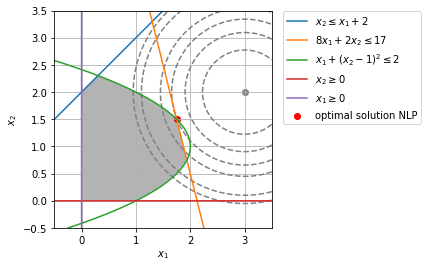

In [10]:
# Generate the feasible region plot of this problem

# Define meshgrid for feasible region
d = np.linspace(-0.5,3.5,300)
x1,x2 = np.meshgrid(d,d)

# Define the lines for the constraints
x = np.linspace(x1.min(), x1.max(), 2000)
# x2 <= x1 + 2
x21 = x + 2
# 8*x1 + 2*x2 <= 17
x22 = (17-8*x)/2.0
# x1 + (x2 - 1)^2 <= 2 # interpret in the reverse way
x1nl = 2- (x - 1)**2 
# obj:(x1-3)^2 + (x2-2)^2
Z = (x1-3)**2 + (x2-2)**2

# Plot feasible region
fig, nlp = plt.subplots()
feas_reg = nlp.imshow( (
    (x1>=0) &           # Bound 1 
    (x2>=0) &           # Bound 2
    (x2 <= x1 + 2) &    # Constraint 1
    (8*x1 + 2*x2 <= 17) & # Constraint 2
    (x1 + (x2-1)**2 <= 2) # Nonlinear constraint
    ).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

# Make plots of constraints
nlp.plot(x, x21, label=r'$x_2 \leq x_1 + 2$')
nlp.plot(x, x22, label=r'$8x_1 + 2x_2 \leq 17$')
nlp.plot(x1nl, x, label=r'$x_1 + (x_2-1)^2 \leq 2$')

# Nonnegativitivy constraints
plt.plot(x, np.zeros_like(x), label=r'$x_2 \geq 0$')
plt.plot(np.zeros_like(x), x, label=r'$x_1 \geq 0$')

# Objective function contours
plt.scatter(3, 2, marker='o',color='grey')

for iter in (0.6, 1.2, 1.8, 2.4, 3.6, 4.2):
    nlp.contour(x1, x2, Z, [iter],
               colors='gray',  # negative contours will be dashed by default
               linestyles='--',
               ) 

# Plotting optimal solution INLP
nlp.scatter(1.75, 1.5, color='r', label='optimal solution NLP')

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.grid('on')
fig.canvas.draw()

In [11]:
############# Convex MINLP ##################

# Define the integer model
model_cinlp = ConcreteModel(name='Example of a convex integer nonlinear program')
#Define the variables
model_cinlp.x = Var([1,2], domain=NonNegativeIntegers)
# Define the objective function
model_cinlp.obj = Objective( expr=5.5*model_cinlp.x[1] + 2.1*model_cinlp.x[2], sense=maximize)
# Define the constraints
model_cinlp.Constraint1 = Constraint( expr = model_cinlp.x[2] <= model_cinlp.x[1] + 2 )
model_cinlp.Constraint2 = Constraint( expr = 8*model_cinlp.x[1] + 2*model_cinlp.x[2] <= 17 )
model_cinlp.Constraint3 = Constraint( expr = model_cinlp.x[1] + (model_cinlp.x[2]-1)**2 <= 2)

# Print the model
model_cinlp.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeIntegers
          2 :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 5.5*x[1] + 2.1*x[2]

3 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body              : Upper : Active
        None :  -Inf : x[2] - (x[1] + 2) :   0.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper : Active
        None :  -Inf : 8*x[1] + 2*x[2] :  17.0 :   True
    Constraint3 : Size=1, Index=None, Active=True
   

In [12]:
solver = SolverFactory('bonmin')
solver.solve(model_cinlp)
# Display solution of the problem
model_cinlp.display()
print("Objective : ", model_cinlp.obj())

Model Example of a convex integer nonlinear program

  Variables:
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :   2.0 :  None : False : False : NonNegativeIntegers

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :   9.7

  Constraints:
    Constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  None : -1.0 :   0.0
    Constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 12.0 :  17.0
    Constraint3 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  2.0 :   2.0
Objective :  9.7


C:\Users\yfq15\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'label'


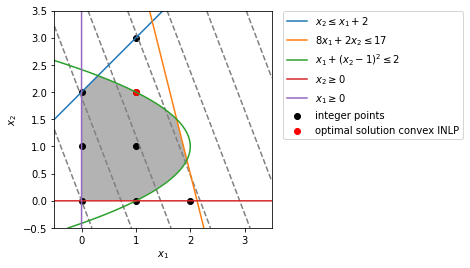

In [13]:
# Generate the feasible region plot of this problem

# Define meshgrid for feasible region
d = np.linspace(-0.5,3.5,300)
x1,x2 = np.meshgrid(d,d)

# Define the lines for the constraints
x = np.linspace(x1.min(), x1.max(), 2000)
# x2 <= x1 + 2
x21 = x + 2
# 8*x1 + 2*x2 <= 17
x22 = (17-8*x)/2.0
# x1 + (x2 - 1)^2 <= 2 # interpret in the reverse way
x1nl = 2- (x - 1)**2 
# obj: min 7.3x1 + 2.1x2
Z = 5.5*x1 + 2.1*x2

# Plot feasible region
fig, cx = plt.subplots()
feas_reg = cx.imshow( (
    (x1>=0) &           # Bound 1 
    (x2>=0) &           # Bound 2
    (x2 <= x1 + 2) &    # Constraint 1
    (8*x1 + 2*x2 <= 17) & # Constraint 2
    (x1 + (x2-1)**2 <= 2) # Nonlinear constraint
    ).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

# Make plots of constraints
cx.plot(x, x21, label=r'$x_2 \leq x_1 + 2$')
cx.plot(x, x22, label=r'$8x_1 + 2x_2 \leq 17$')
cx.plot(x1nl, x, label=r'$x_1 + (x_2-1)^2 \leq 2$')

# Nonnegativitivy constraints
plt.plot(x, np.zeros_like(x), label=r'$x_2 \geq 0$')
plt.plot(np.zeros_like(x), x, label=r'$x_1 \geq 0$')

# Objective function contours
cx.contour(x1, x2, Z,
                 colors='gray',  # negative contours will be dashed by default
                 linestyles='--',
                 label=r'$\min 7.3x_1 + 2.1x_2$'
                 )

# Define grid for integer points
x1_int, x2_int = np.meshgrid(range(math.ceil(x1.max())), range(math.ceil(x2.max())))
idx = ((x1_int>=0) & (x2_int <= x1_int + 2) & (8*x1_int + 2*x2_int <= 17) & (x2_int>=0))
x1_int, x2_int = x1_int[idx], x2_int[idx]
cx.scatter(x1_int,x2_int,color='k', label='integer points')

# Plotting optimal solution INLP
cx.scatter(1,2,color='r', label='optimal solution convex INLP')

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
fig.canvas.draw()
#fig


In [14]:
############# Non-Convex MINLP ##################

# Define the integer model
model_ncinlp = ConcreteModel(name='Example of a non-convex integer nonlinear program')
#Define the variables
model_ncinlp.x = Var([1,2], domain=NonNegativeIntegers)
# Define the objective function
model_ncinlp.obj = Objective( expr=5.5*model_ncinlp.x[1] + 2.1*model_ncinlp.x[2], sense=maximize)

# Define the constraints
model_ncinlp.Constraint1 = Constraint( expr = model_ncinlp.x[2] <= model_ncinlp.x[1] + 2 )
model_ncinlp.Constraint2 = Constraint( expr = 8*model_ncinlp.x[1] + 2*model_ncinlp.x[2] <= 17 )
model_ncinlp.Constraint3 = Constraint( expr = model_ncinlp.x[1] + (model_ncinlp.x[2]-1)**2 <= 2 )
model_ncinlp.Constraint4 = Constraint(expr = (model_ncinlp.x[2]-1)**2 >= 1/2 + model_ncinlp.x[1])

# Print the model
model_ncinlp.pprint()

1 Set Declarations
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeIntegers
          2 :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 5.5*x[1] + 2.1*x[2]

4 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body              : Upper : Active
        None :  -Inf : x[2] - (x[1] + 2) :   0.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper : Active
        None :  -Inf : 8*x[1] + 2*x[2] :  17.0 :   True
    Constraint3 : Size=1, Index=None, Active=True
   

In [15]:
solver = SolverFactory('couenne')
solver.solve(model_ncinlp)
# Display solution of the problem
model_ncinlp.display()
print("Objective : ", model_ncinlp.obj())

Model Example of a non-convex integer nonlinear program

  Variables:
    x : Size=2, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :   2.0 :  None : False : False : NonNegativeIntegers

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :   4.2

  Constraints:
    Constraint1 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  0.0 :   0.0
    Constraint2 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  4.0 :  17.0
    Constraint3 : Size=1
        Key  : Lower : Body : Upper
        None :  None :  1.0 :   2.0
    Constraint4 : Size=1
        Key  : Lower : Body : Upper
        None :  None : -0.5 :   0.0
Objective :  4.2


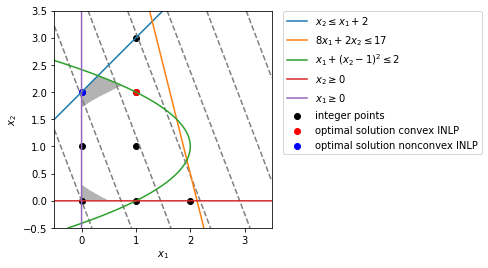

In [16]:
# Define grid for integer points
feas_reg.remove()
feas_reg = cx.imshow( (
    (x1>=0) &           # Bound 1 
    (x2>=0) &           # Bound 2
    (x2 <= x1 + 2) &    # Constraint 1
    (8*x1 + 2*x2 <= 17) & # Constraint 2
    ((x2-1)**2 <= 2-x1) & # Nonlinear constraint 1
    ((x2-1)**2 >= x1+0.5) # Nonlinear constraint 2
    ).astype(int) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

x1nl = -1/2 + (x - 1)**2
# Nonlinear constraint
nl_const = ax.plot(x1nl, x, label=r'$(x_2-1)^2 \geq x_1 + 1/2$')

# Plotting optimal solution INLP
cx.scatter(0,2,color='b', label='optimal solution nonconvex INLP')

cx.get_legend().remove()
cx.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.canvas.draw()
fig